##  **Importing Essential Libraries**



In [217]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

**Ignore warnings**

In [115]:
import warnings

warnings.filterwarnings('ignore')

___

## **Reading the Data**

In [118]:
data = pd.read_csv('Country-data.csv')

___

## **Exploring the Data**

In [121]:
# print * at the beginning and end of the header
def print_header(title):
    print("*" * 20, title, "*" * 20)
    
# print head values
def print_top_five_values(data):
    print_header("Top five values of dataset is")
    print(data.head(), "\n")

# shows column in the dataset joining with a comma 
def display_columns(data):
    print_header("Columns in Dataset is")
    print(", ".join(data.columns.tolist()), "\n")

# shows how many rows and column in the dataset
def display_dataset_shape(data):
    print_header("Dataset Shape")
    print(f'There are {data.shape[0]} rows and {data.shape[1]} columns\n')

# data types in the data frame
def display_data_types(data):
    print_header("Data_Type of each columns")
    print(data.dtypes, "\n")

# check the missing values in the df
def display_missing_values(data):
    print_header("Counting Missing values of each columns")
    print(data.isnull().sum().sort_values(ascending=False), "\n")

# count the same values that is repeated on the same column
def display_unique_values(data):
    print_header("Counting Number of Unique values in each columns")
    print(data.nunique(), "\n")

# count the same values that repeat in categorical features
def display_categorical_value_counts(data):
    print_header("Count Unique values of each catagorical features")
    print(data["country"].value_counts(), "\n")

# basic statistics of data like std, mean, count, min, max
def display_basic_statistics(data):
    print_header("Basic Statistics of Data")
    print(data.describe().round(0), "\n")
    
# Getting the basic info about count and null values in the column
def display_basic_info(data):
    print_header("Basic info of Data")
    print(data.info(), "\n")

# call all the above functions 
def Data_EDA(data):
    """
    Perform exploratory data analysis (EDA) on the given dataset.

    This function displays various aspects of the dataset, including:
    - The top five values of the dataset
    - The names of the columns
    - The shape of the dataset (number of rows and columns)
    - The data types of each column
    - A count of missing values for each column
    - The number of unique values in each column
    - Count of unique values in specific categorical features
    - Basic statistics of numerical features
    - Basic information about the dataset structure

    Parameters:
    data : pandas.DataFrame
        The dataset on which to perform analysis or EDA. It should be in a Pandas data frame.

    Returns:
    None
    """
    print_top_five_values(data)
    display_columns(data)
    display_dataset_shape(data)
    display_data_types(data)
    display_missing_values(data)
    display_unique_values(data)
    display_categorical_value_counts(data)
    display_basic_statistics(data)
    display_basic_info(data)

Data_EDA(data)

******************** Top five values of dataset is ********************
               country  child_mort  exports  health  imports  income  \
0          Afghanistan        90.2     10.0    7.58     44.9    1610   
1              Albania        16.6     28.0    6.55     48.6    9930   
2              Algeria        27.3     38.4    4.17     31.4   12900   
3               Angola       119.0     62.3    2.85     42.9    5900   
4  Antigua and Barbuda        10.3     45.5    6.03     58.9   19100   

   inflation  life_expec  total_fer   gdpp  
0       9.44        56.2       5.82    553  
1       4.49        76.3       1.65   4090  
2      16.10        76.5       2.89   4460  
3      22.40        60.1       6.16   3530  
4       1.44        76.8       2.13  12200   

******************** Columns in Dataset is ********************
country, child_mort, exports, health, imports, income, inflation, life_expec, total_fer, gdpp 

******************** Dataset Shape ********************
There a

___
## **Dividing the Data into Two Sections**

### **Numerical Data**
All columns in the dataset are numerical, including **child_mort**, **exports**, **health**, **imports**, **inflation**, **life_expec**, **total_fer**, **income**, and **gdpp**.

### **Categorical Data**
The only categorical column is **country**.



Since all columns except **country** are numerical, we can directly select the numerical data by excluding the **country** column from the dataset.

In [125]:
# deop the categorical column
num_data = data.drop("country", axis=1)

In [127]:
# print numerical data 
num_data

,child_mort,exports,health,imports,income,inflation,life_expec,total_fer,gdpp
0,90.2,10.0,7.58,44.9,1610,9.44,56.2,5.82,553
1,16.6,28.0,6.55,48.6,9930,4.49,76.3,1.65,4090
2,27.3,38.4,4.17,31.4,12900,16.10,76.5,2.89,4460
3,119.0,62.3,2.85,42.9,5900,22.40,60.1,6.16,3530
4,10.3,45.5,6.03,58.9,19100,1.44,76.8,2.13,12200
...,...,...,...,...,...,...,...,...,...
162,29.2,46.6,5.25,52.7,2950,2.62,63.0,3.50,2970
163,17.1,28.5,4.91,17.6,16500,45.90,75.4,2.47,13500
164,23.3,72.0,6.84,80.2,4490,12.10,73.1,1.95,1310
165,56.3,30.0,5.18,34.4,4480,23.60,67.5,4.67,1310


---

## **Visualizing Numerical Columns**

In [ ]:
def correlation_matrix_with_plotting(num_data):
    """
    This function calculates and plots the correlation matrix for the given numerical data.

    Parameters:
    num_data : pandas.DataFrame
        The dataframe containing numerical data for which the correlation matrix will be computed and plotted.

    The function performs the following steps:
    1. Calculates the correlation matrix of the numerical data.
    2. Prints the correlation matrix to the console.
    3. Creates a heatmap of the correlation matrix using seaborn and displays the plot.
    4. The heatmap is annotated with correlation values and uses the 'magma' colormap.
    
    Returns:
    None
    """
    # Calculate the correlation matrix
    correlation_matrix = num_data.corr()
    
    # Print the correlation matrix
    print(correlation_matrix)
    
    # Plot the correlation matrix as a heatmap
    plt.figure(figsize=(16, 8), dpi=144)  # Set the figure size and DPI
    # Create a heatmap with annotations and 'magma' colormap
    sns.heatmap(correlation_matrix, annot=True, cmap='magma') 
    # Add a title to the heatmap
    plt.title('Correlation Matrix', color="Purple", fontsize=16, pad=12)  
    # Display the plot
    plt.show() 



            child_mort   exports    health   imports    income  inflation  \
child_mort    1.000000 -0.318093 -0.200402 -0.127211 -0.524315   0.288276   
exports      -0.318093  1.000000 -0.114408  0.737381  0.516784  -0.107294   
health       -0.200402 -0.114408  1.000000  0.095717  0.129579  -0.255376   
imports      -0.127211  0.737381  0.095717  1.000000  0.122406  -0.246994   
income       -0.524315  0.516784  0.129579  0.122406  1.000000  -0.147756   
inflation     0.288276 -0.107294 -0.255376 -0.246994 -0.147756   1.000000   
life_expec   -0.886676  0.316313  0.210692  0.054391  0.611962  -0.239705   
total_fer     0.848478 -0.320011 -0.196674 -0.159048 -0.501840   0.316921   
gdpp         -0.483032  0.418725  0.345966  0.115498  0.895571  -0.221631   

            life_expec  total_fer      gdpp  
child_mort   -0.886676   0.848478 -0.483032  
exports       0.316313  -0.320011  0.418725  
health        0.210692  -0.196674  0.345966  
imports       0.054391  -0.159048  0.115498  

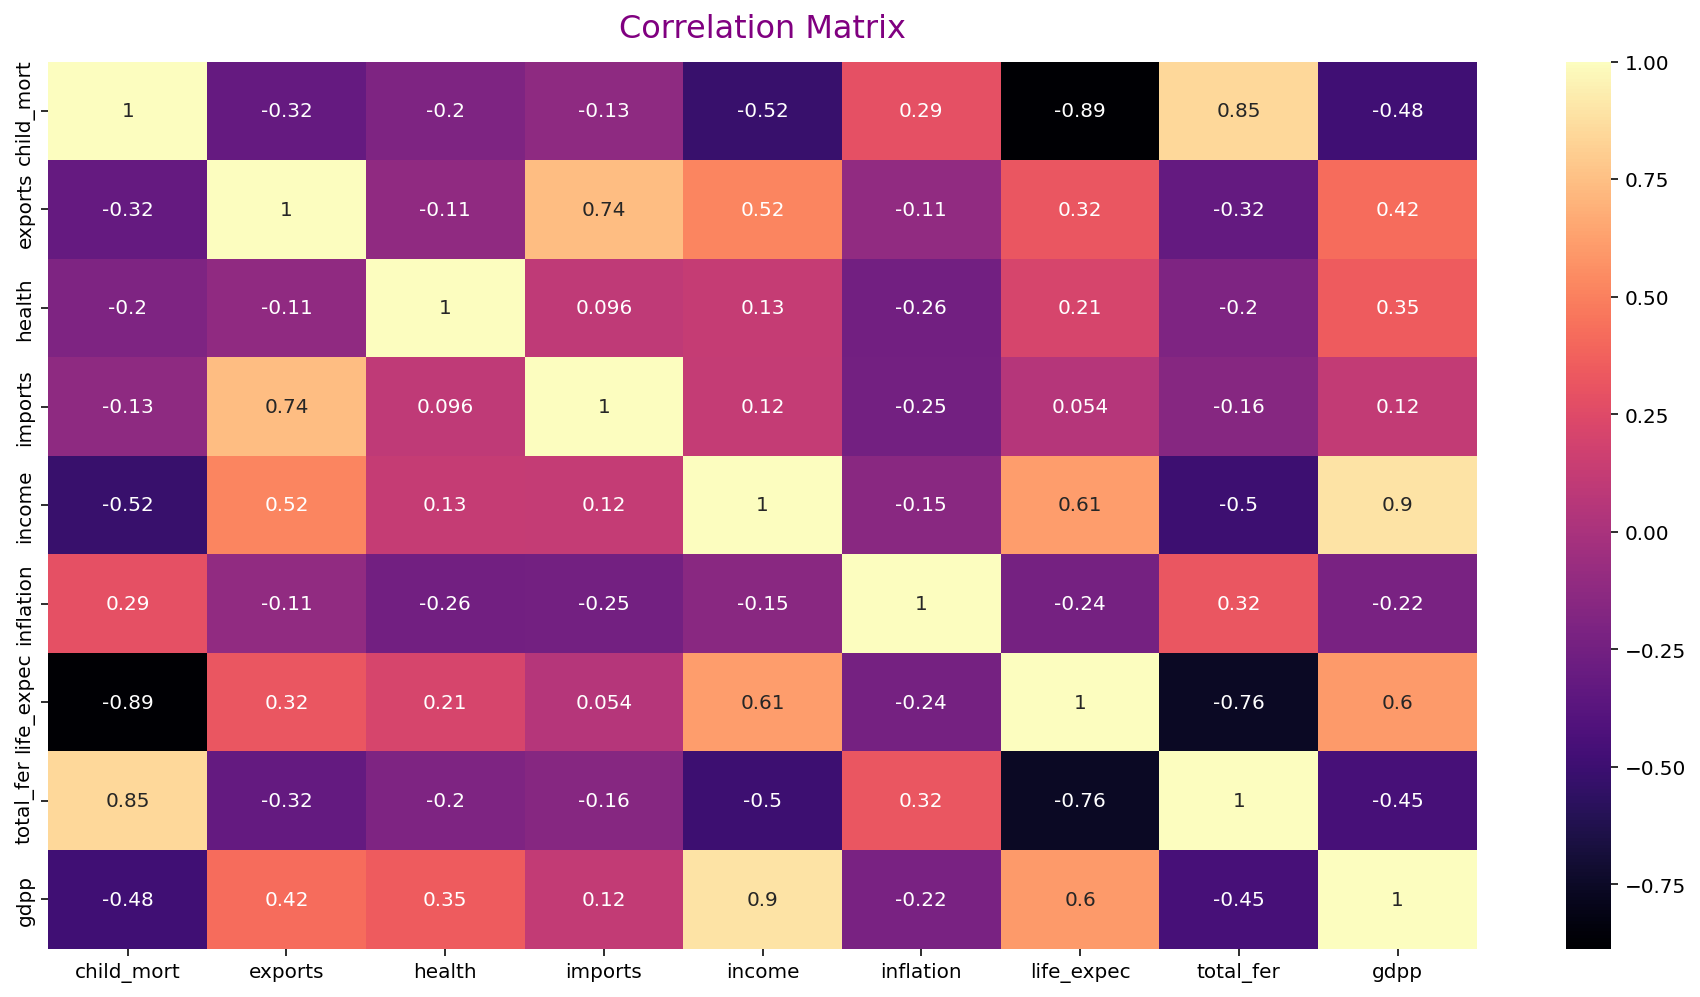

In [132]:
# function calls
correlation_matrix_with_plotting(num_data)

In [134]:
def scatterplot_correlation(x_value, y_value, hue_value, size_value, title, x_label, y_label):
    """
    This function creates and displays a scatter plot with various features.

    Parameters:
    x_value : str
        The column name in the data for the x-axis values.
    y_value : str
        The column name in the data for the y-axis values.
    hue_value : str
        The column name in the data to color-code the points by different categories.
    size_value : str
        The column name in the data to size the points.
    title : str
        The title of the scatter plot.
    x_label : str
        The label for the x-axis.
    y_label : str
        The label for the y-axis.

    The function performs the following steps:
    1. Sets the figure size.
    2. Creates a scatter plot using seaborn with the given parameters.
    3. Sets the title and labels for the plot.
    4. Displays the scatter plot.
    
    Returns:
    None
    """
    # Set the figure size
    plt.figure(figsize=(14, 7))
    
    # Create the scatter plot
    sns.scatterplot(
        data=data, x=x_value, y=y_value, hue=hue_value, 
        palette='viridis', alpha=0.7, size=size_value, sizes=(20, 200)
    )
    
    # Set the title and labels
    plt.title(title)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    
    # Display the plot
    plt.show()

___
## **Strong Positive Correlation**

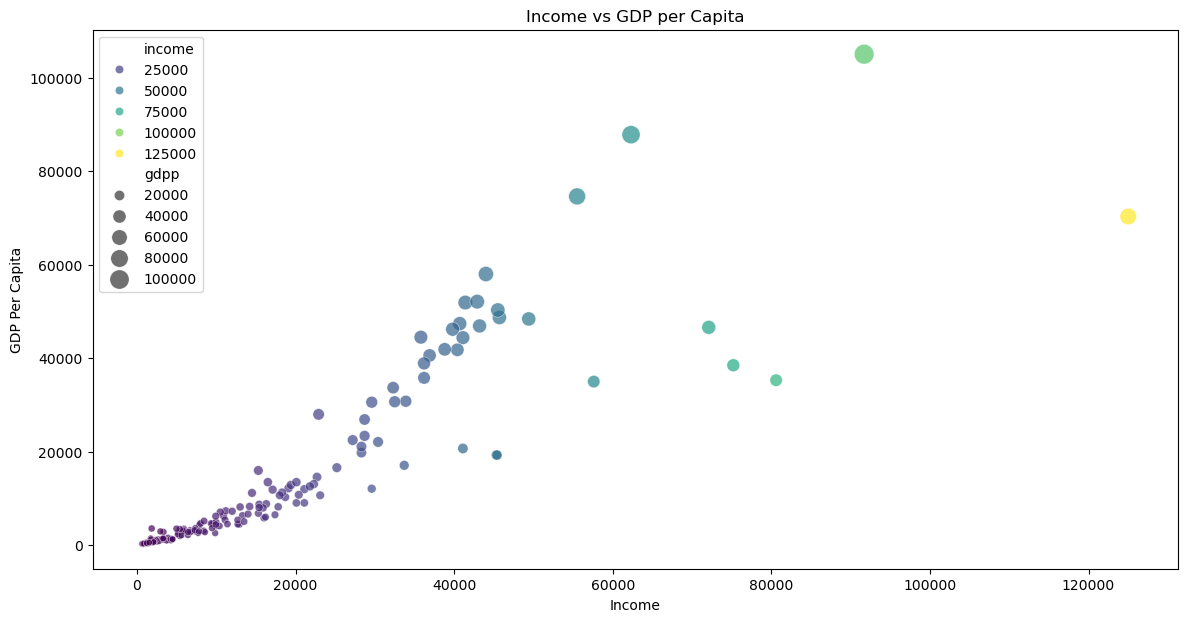

In [137]:
# Assign Values which is given to the parameters of the function
x_value = 'income'
y_value = 'gdpp'
hue_value = 'income'
size_value = 'gdpp'
title = 'Income vs GDP per Capita'
x_label = 'Income'
y_label = 'GDP Per Capita'

# Function calling for the strong positive correlation
scatterplot_corerelation(x_value, y_value, hue_value, size_value, title, x_label, y_label)

---
### **Moderate Positive Correlation**

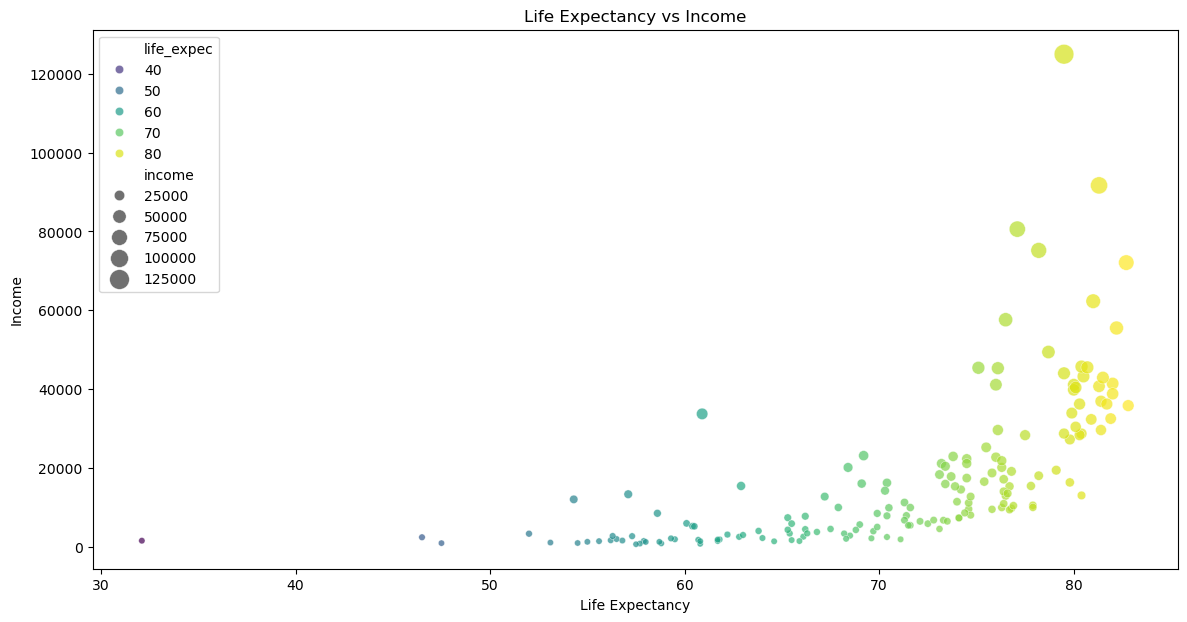

In [140]:
# Assign Values which is given to the parameters of the function
x_value = 'life_expec'
y_value = 'income'
hue_value = 'life_expec'
size_value = 'income'
title = 'Life Expectancy vs Income'
x_label = 'Life Expectancy'
y_label = 'Income'

# Function calling for the moderate positive correlation
scatterplot_corerelation(x_value, y_value, hue_value, size_value, title, x_label, y_label)

___
## **Strong Negative Correlation**

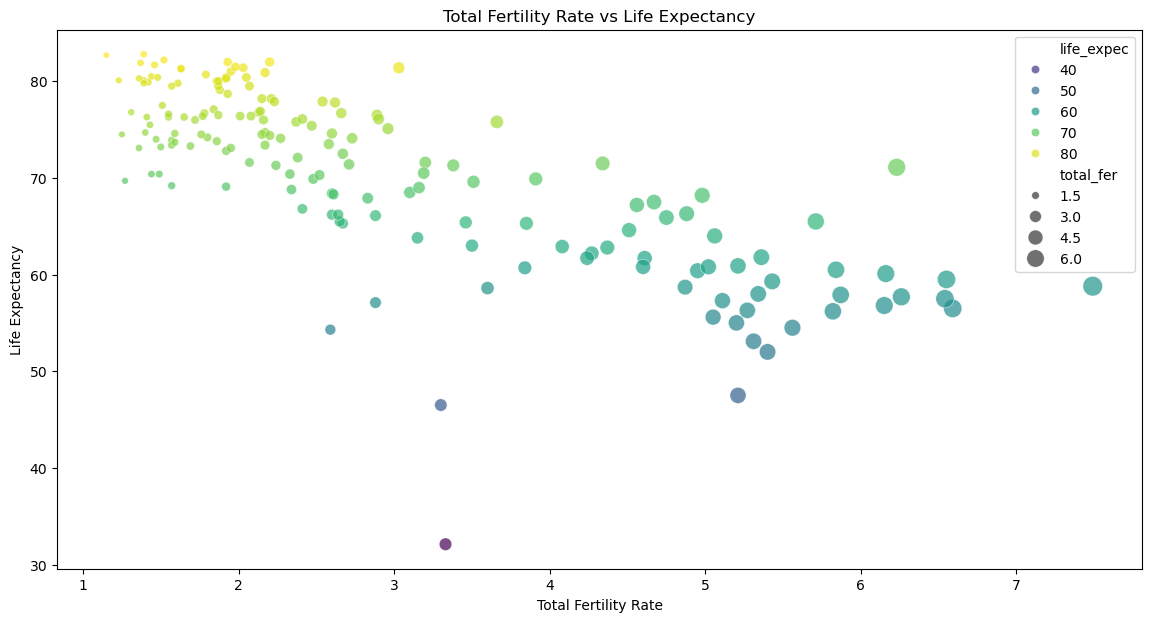

In [143]:
# Assign Values which is given to the parameters of the function

x_value = 'total_fer'
y_value = 'life_expec'
hue_value = 'life_expec'
size_value = 'total_fer'
title = 'Total Fertility Rate vs Life Expectancy'
x_label = 'Total Fertility Rate'
y_label = 'Life Expectancy'

# Function calling for the strong negative correlation
scatterplot_corerelation(x_value, y_value, hue_value, size_value, title, x_label, y_label)

___
## **Moderate Negative Correlation**

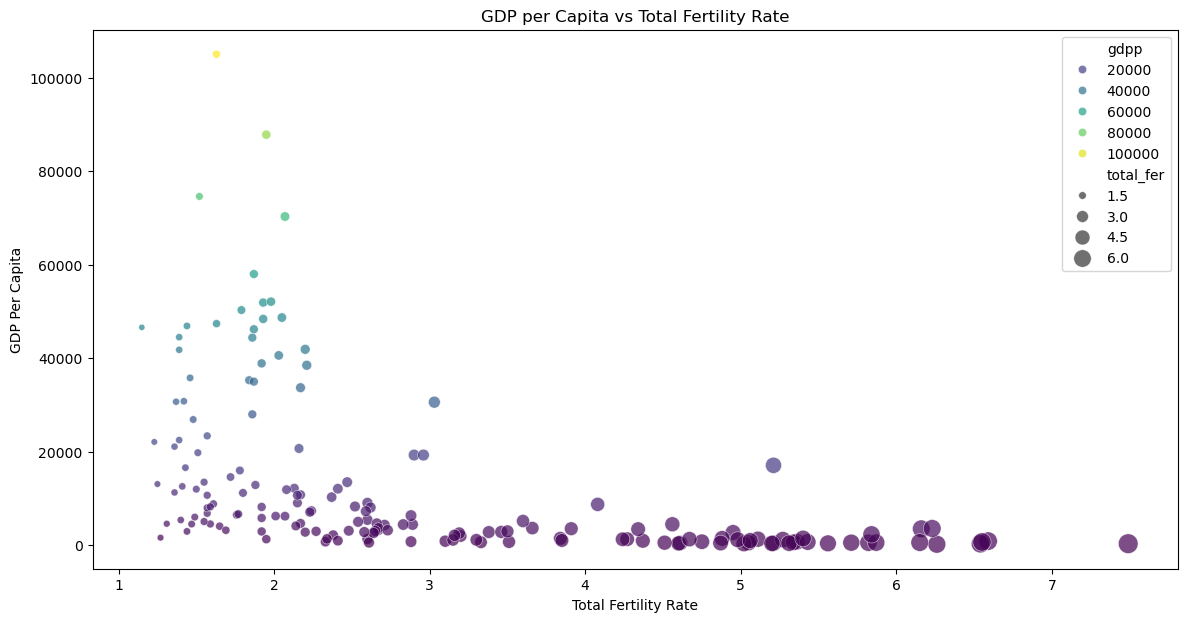

In [146]:
# Assign Values which is given to the parameters of the function
x_value = 'total_fer'
y_value = 'gdpp'
hue_value = 'gdpp'
size_value = 'total_fer'
title = 'GDP per Capita vs Total Fertility Rate'
x_label = 'Total Fertility Rate'
y_label = 'GDP Per Capita'

# Function calling for the moderate negative correlation
scatterplot_corerelation(x_value, y_value, hue_value, size_value, title, x_label, y_label)

___
## **Checking Outliers**

In [151]:
def num_data_outliers_boxplot():
    """
    This function creates and displays box plots for each numeric column in the dataset.

    The function performs the following steps:
    1. Plots box plots for each numeric column in the dataset.
    2. Arranges the plots in a grid layout.
    3. Sets a title for the entire plot.
    4. Displays the box plots.

    Parameters:
    num_data : pandas.DataFrame
        The dataframe containing numeric data for which the box plots will be created.

    Returns:
    None
    """
    # Plot box plots for each numeric column, arranged in a grid layout
    num_data.plot(kind="box", subplots=True, layout=(3, 3), figsize=(12, 12))

    # Set a title for the entire plot
    plt.suptitle("Box Plot for Numeric Columns")

    # Display the box plots
    plt.show()


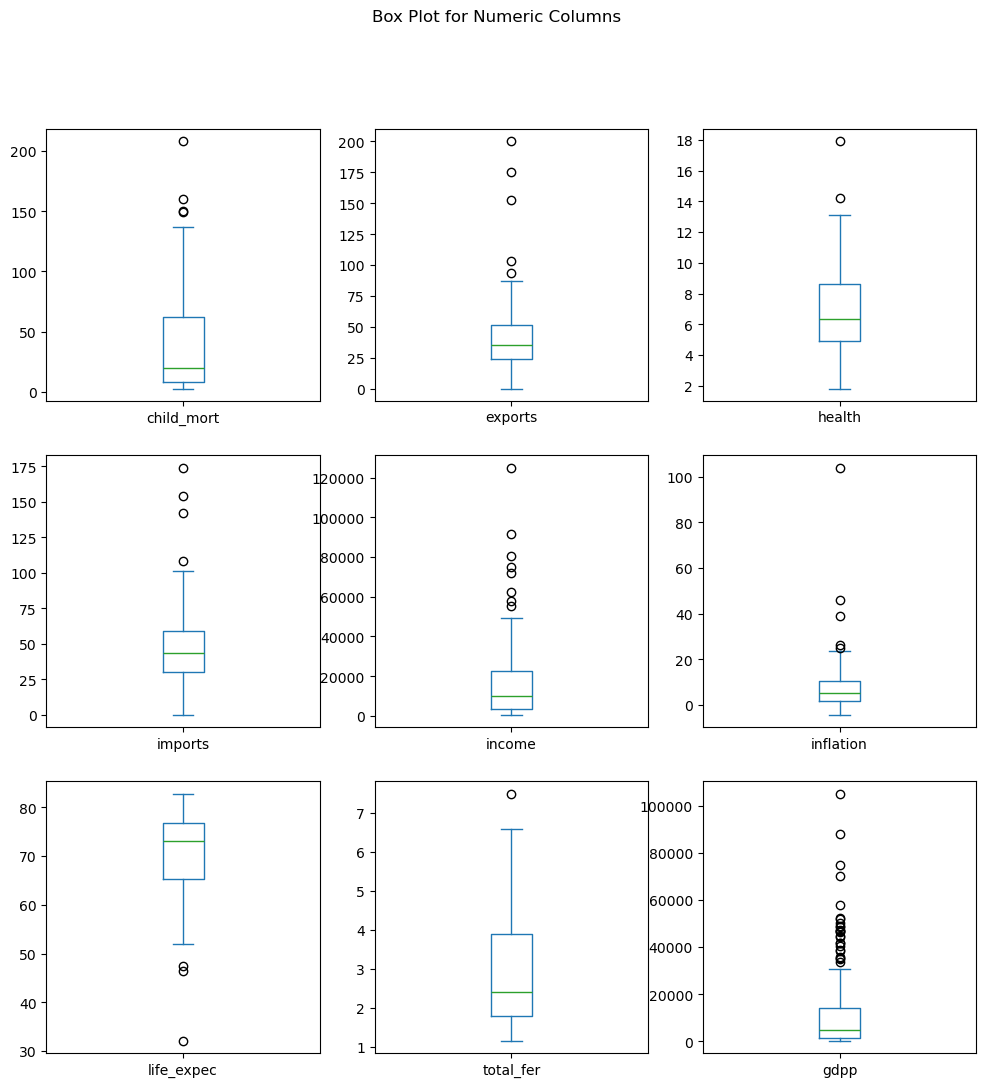

In [153]:
# function calls
num_data_outliers_boxplot()

___
## **Sorting Data to get top 10 Countries**

**Plot the chart of the countries by income and gdp**

In [157]:
def top_10_countries_plot():
    """
    This function creates and displays a bar plot of the top 10 countries based on income and GDP per capita.

    The function performs the following steps:
    1. Selects the relevant columns ('country', 'income', 'gdpp') from the dataset.
    2. Sorts the data by 'income' and 'gdpp' in descending order.
    3. Extracts the top 10 countries based on the sorted data.
    4. Creates a bar plot with 'income' on the x-axis and 'country' on the y-axis.
    5. The plot is color-coded by 'income' and displays appropriate titles and labels.
    
    Parameters:
    data : pandas.DataFrame
        The dataframe containing the data with columns 'country', 'income', and 'gdpp'.

    Returns:
    None
    """
    # Select relevant columns from the dataset
    column_selected = data[['country', 'income', 'gdpp']]
    
    # Sort data by 'income' and 'gdpp' in descending order
    sort_data = column_selected.sort_values(by=['income', 'gdpp'], ascending=False)
    
    # Extract the top 10 countries based on the sorted data
    top_10_countries = sort_data.head(10)
    
    # Set the figure size
    plt.figure(figsize=(14, 7))
    
    # Create a bar plot with 'income' on the x-axis and 'country' on the y-axis
    sns.barplot(x='income', y='country', data=top_10_countries, hue='income', palette='viridis')
    
    # Set the title and labels for the plot
    plt.title('Top 10 Countries by Income and GDP per Capita')
    plt.xlabel('Income')
    plt.ylabel('Country')
    
    # Display the plot
    plt.show()

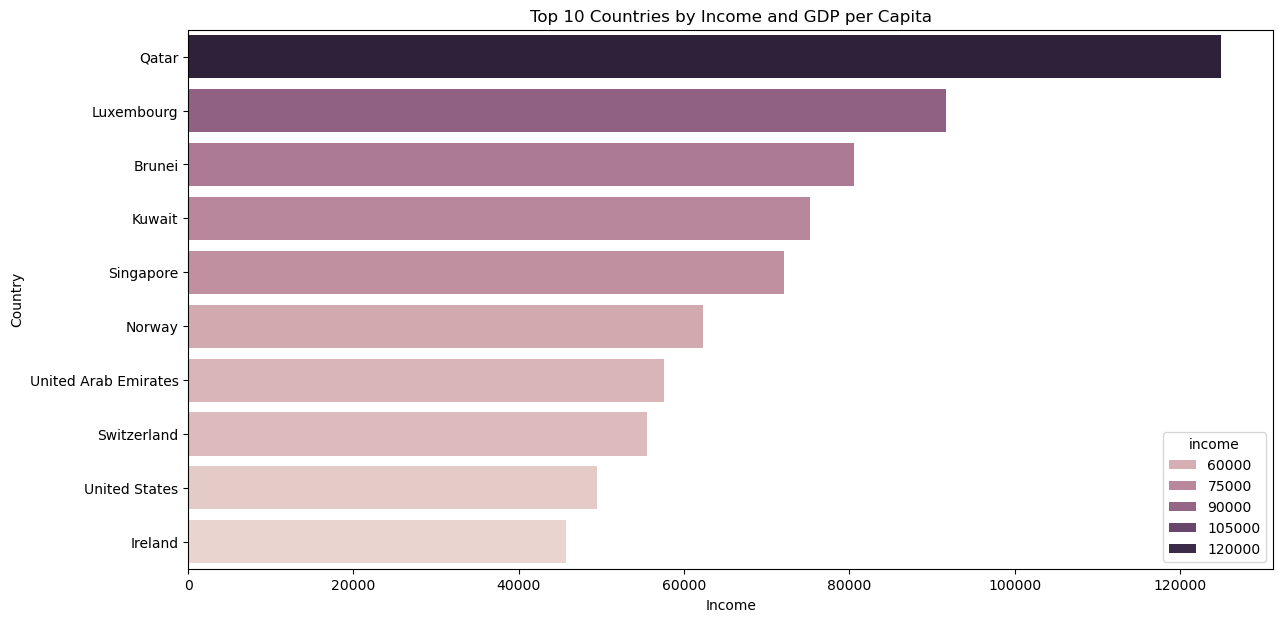

In [159]:
# function calls
top_10_countries_plot()



---


#### **Top 15 Countries by Lowest Child Mortality and Highest Income**

In [162]:
def top_15_countries_lowest_child_mortality_with_highest_income():
    """
    This function creates and displays a bar plot of the top 15 countries with the lowest child mortality rates and highest income.

    The function performs the following steps:
    1. Selects the relevant columns ('country', 'income', 'child_mort') from the dataset.
    2. Sorts the data by 'child_mort' in ascending order.
    3. Extracts the top 15 countries based on the sorted data.
    4. Creates a bar plot with 'country' on the x-axis and 'child_mort' on the y-axis.
    5. The plot is color-coded by 'income' and displays appropriate titles and labels.
    
    Parameters:
    data : pandas.DataFrame
        The dataframe containing the data with columns 'country', 'income', and 'child_mort'.

    Returns:
    None
    """
    # Select relevant columns from the dataset
    column_selected = data[['country', 'income', 'child_mort']]
    
    # Sort data by 'child_mort' in ascending order
    sort_data = column_selected.sort_values(by=['child_mort'], ascending=True)
    
    # Extract the top 15 countries based on the sorted data
    first_15_countries = sort_data.head(15)
    
    # Set the figure size
    plt.figure(figsize=(14, 7))
    
    # Create a bar plot with 'country' on the x-axis and 'child_mort' on the y-axis
    sns.barplot(x='country', y='child_mort', data=first_15_countries, hue='income', palette='Greens')
    
    # Set the title and labels for the plot
    plt.title('Top 15 Countries with Lowest Child Mortality Rate and Highest Income')
    plt.xlabel('Country')
    plt.ylabel('Child Mortality Rate')
    
    # Rotate the x-axis labels for better readability
    plt.xticks(rotation=45)
    
    # Display the plot
    plt.show()

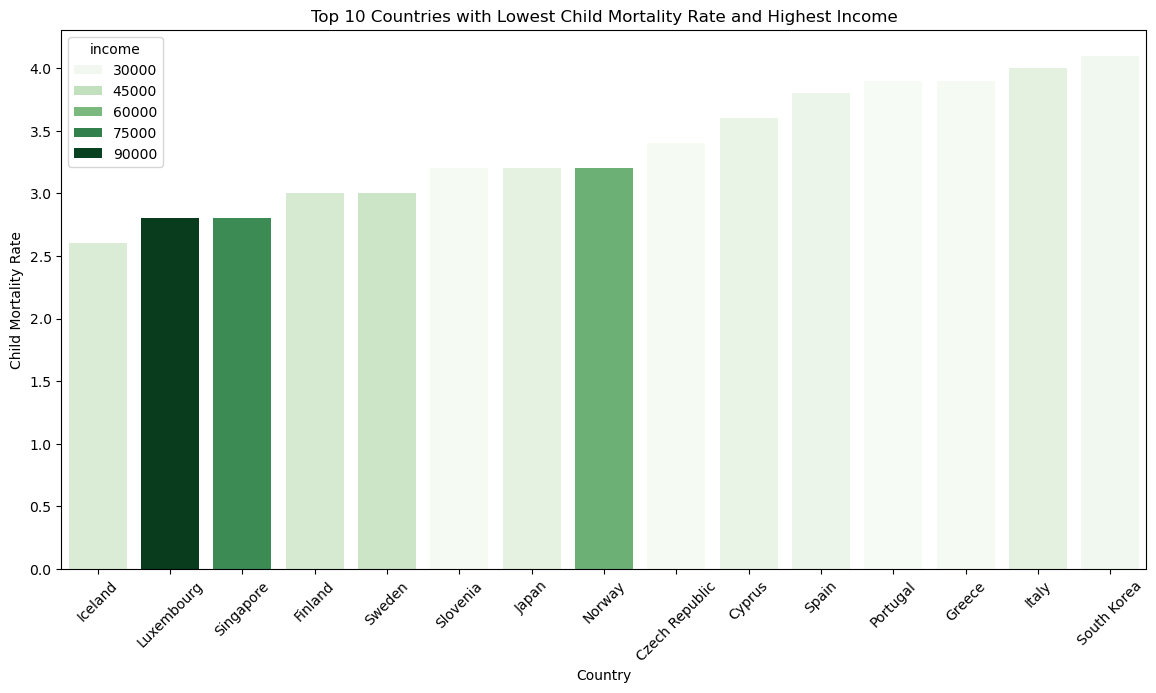

In [164]:
# function calls
top_15_countries_loest_child_mortality_with_highest_income()

In [209]:
def perform_feature_scaling_and_pca(num_data):
    """
    This function performs feature scaling and Principal Component Analysis (PCA) on the given numerical data.

    The function performs the following steps:
    1. Scales the numerical data using StandardScaler.
    2. Applies PCA to the scaled data to understand the explained variance by each principal component.
    3. Determines the number of components required to retain 95% of the variance.
    4. Transforms the scaled data into the reduced dimensionality space using the calculated number of components.

    Parameters:
    num_data : pandas.DataFrame
        The dataframe containing numerical data to be scaled and reduced in dimensionality.

    Returns:
    pca_data : numpy.ndarray
        The transformed data in the reduced dimensionality space.
    """

    # Feature Scaling
    scaler = StandardScaler()
    print(scaler)
    scaled_data = scaler.fit_transform(num_data)

    # Dimensionality Reduction with PCA
    pca = PCA()
    pca.fit(scaled_data)
    explained_variance = pca.explained_variance_ratio_
    cumulative_variance = np.cumsum(explained_variance)
    n_components = np.argmax(cumulative_variance >= 0.95) + 1
    print(f"Number of components to retain 95% of the variance: {n_components}")
    
    # Apply PCA with the determined number of components
    pca = PCA(n_components=n_components)
    pca_data = pca.fit_transform(scaled_data)
    
    return pca_data, scaled_data


In [211]:
# function calls
pca_data, scaled_data = perform_feature_scaling_and_pca(num_data)

StandardScaler()
Number of components to retain 95% of the variance: 6


---


## **Methods to Determine the Optimal Number of Clusters**

## Elbow Method
The elbow method is a graphical method for finding the optimal K value in a k-means clustering algorithm.

In [213]:
def elbow_method(pca_data):
    """
    This function applies the Elbow Method to determine the optimal number of clusters for K-Means clustering.
    
    The function performs the following steps:
    1. Iterates through a range of cluster numbers (from 2 to 10).
    2. For each number of clusters, it fits a K-Means model to the provided PCA-transformed data.
    3. Appends the inertia value (sum of squared distances of samples to their closest cluster center) for each model.
    4. Plots the inertia values against the number of clusters to visualize the Elbow Method.

    Parameters:
    pca_data : numpy.ndarray
        The PCA-transformed data on which K-Means clustering will be applied.

    Returns:
    None
    """

    # List to store inertia values for different numbers of clusters
    inertia_values = []
    
    # Iterate through a range of cluster numbers (2 to 10)
    for i in range(2, 11):
        # Initialize and fit the K-Means model
        model = KMeans(n_clusters=i, random_state=42)
        model.fit(pca_data)
        
        # Append the inertia value to the list
        inertia_values.append(model.inertia_)
    
    # Plot the inertia values against the number of clusters
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), inertia_values, marker='|')
    
    # Set the labels and title for the plot
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia Values')
    plt.title('Elbow Method')
    
    # Display the plot
    plt.show()


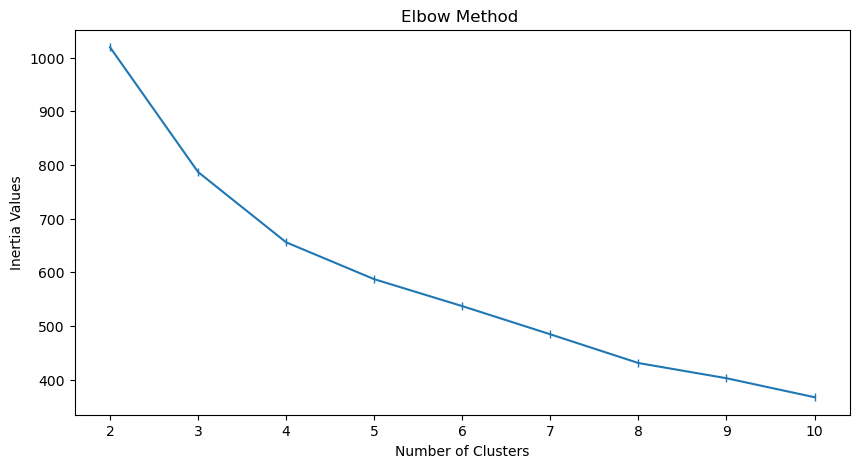

In [215]:
# function calls
elbow_method(pca_data)

___
## **Silhouette Plot**
The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

**Silhouette Score:** The silhouette value is a measure of how similar an object is to its own cluster (cohesion) compared to other clusters (separation).

In [187]:
def silhouette_scores(scaled_data):
    """
    This function calculates and plots the silhouette scores for a range of cluster numbers to evaluate clustering performance.

    The function performs the following steps:
    1. Iterates through a range of cluster numbers (from 2 to 10).
    2. For each number of clusters, it fits a K-Means model to the provided scaled data.
    3. Calculates the silhouette score for each clustering solution.
    4. Appends the silhouette scores to a list.
    5. Plots the silhouette scores against the number of clusters to visualize the optimal clustering.

    Parameters:
    scaled_data : numpy.ndarray
        The scaled data on which K-Means clustering and silhouette score calculation will be applied.

    Returns:
    None
    """
    from sklearn.cluster import KMeans
    from sklearn.metrics import silhouette_score
    import matplotlib.pyplot as plt

    # List to store silhouette scores for different numbers of clusters
    silhouette_scores = []

    # Iterate through a range of cluster numbers (2 to 10)
    for k in range(2, 11):
        # Initialize and fit the K-Means model
        model = KMeans(n_clusters=k, random_state=42, n_init=10)
        model.fit(scaled_data)
        
        # Calculate the silhouette score for the current clustering
        score = silhouette_score(scaled_data, model.labels_)
        
        # Append the silhouette score to the list
        silhouette_scores.append(score)
        
    # Plot the silhouette scores against the number of clusters
    plt.figure(figsize=(10, 5))
    plt.plot(range(2, 11), silhouette_scores, marker='o', color='red')
    
    # Set the labels and title for the plot
    plt.xlabel('Number of clusters')
    plt.ylabel('Silhouette Score')
    plt.title('Silhouette Score Method')
    
    # Display the plot
    plt.show()

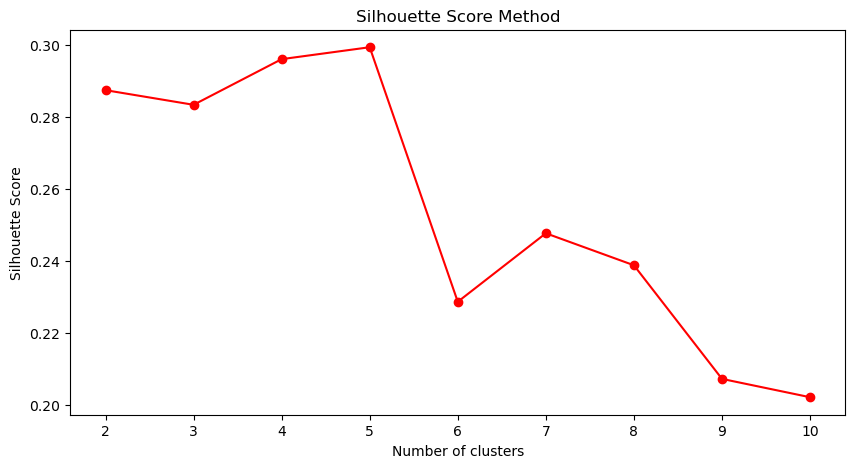

In [189]:
# function calls
silhouette_scores(scaled_data)

In [191]:
def kmean_cluster(data, scaler):
    """
    This function performs K-Means clustering on the provided data and visualizes the clusters.

    The function performs the following steps:
    1. Drops the 'country' column from the data to use only numerical features.
    2. Scales the numerical data using the provided scaler.
    3. Performs K-Means clustering with the optimal number of clusters (3).
    4. Adds cluster labels to the original data.
    5. Back-scales the cluster centers to the original scale for visualization.
    6. Reduces dimensions to 2D for visualization using PCA.
    7. Creates a scatter plot to visualize the clusters and their centers.

    Parameters:
    data : pandas.DataFrame
        The dataframe containing the data to be clustered.
    scaler : sklearn.preprocessing.StandardScaler
        The scaler used to normalize the data.

    Returns:
    None
    """
    # Drop the 'country' column to use only numerical features
    numeric_data = data.drop(columns=['country'])
    
    # Normalize the data using the provided scaler
    normalized_data = scaler.fit_transform(numeric_data)
    
    # Perform K-Means clustering with the optimal number of clusters (3)
    optimal_clusters = 3
    kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(normalized_data)
    
    # Add cluster labels to the original data
    data['Cluster'] = cluster_labels
    
    # Back-scale cluster centers to the original scale for visualization
    cluster_centers = scaler.inverse_transform(kmeans.cluster_centers_)
    cluster_centers_df = pd.DataFrame(cluster_centers, columns=numeric_data.columns)
    
    # Reduce dimensions to 2D for visualization using PCA
    pca = PCA(n_components=2)
    reduced_data = pca.fit_transform(normalized_data)
    reduced_centers = pca.transform(kmeans.cluster_centers_)
    
    # Create a scatter plot to visualize the clusters and their centers
    plt.figure(figsize=(10, 7))
    colors = ['red', 'blue', 'green']
    for i in range(optimal_clusters):
        plt.scatter(
            reduced_data[cluster_labels == i, 0],
            reduced_data[cluster_labels == i, 1],
            label=f'Cluster {i + 1}',
            color=colors[i], alpha=0.6
        )
    
    # Plot cluster centers
    plt.scatter(
        reduced_centers[:, 0], reduced_centers[:, 1],
        color='black', marker='x', s=200, label='Cluster Centers'
    )
    
    # Set title and labels for the plot
    plt.title('Clusters Visualization')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()

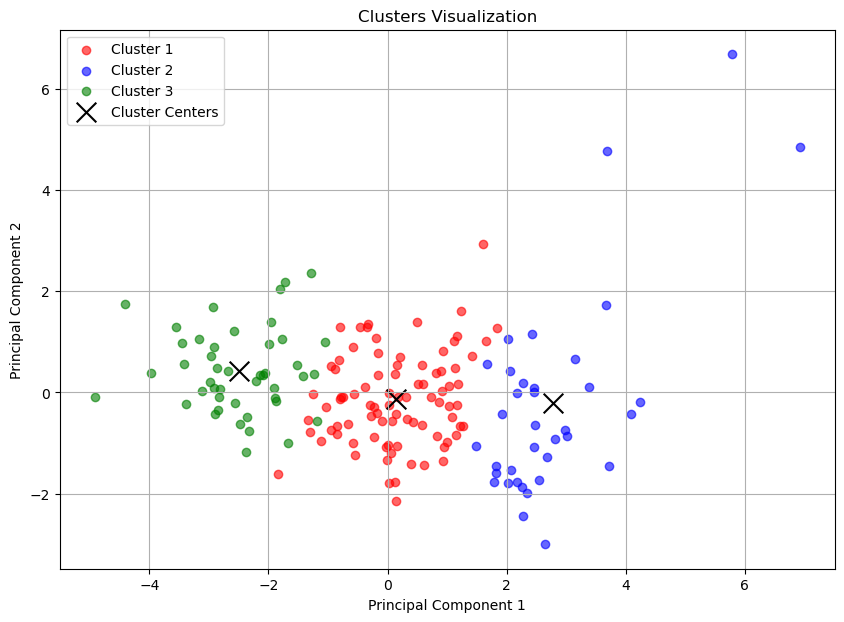

In [193]:
# function calls
kmean_cluster(data, scaler)

In [199]:
def profile_based_cluster_top_10_countries():
    """
    This function creates and displays a scatter plot for the top 10 countries based on income and GDP per capita.

    The function performs the following steps:
    1. Selects the relevant columns ('country', 'income', 'gdpp') from the dataset.
    2. Sorts the data by 'income' and 'gdpp' in descending order.
    3. Extracts the top 10 countries based on the sorted data.
    4. Creates a scatter plot with 'country' on the x-axis, 'income' on the y-axis, and colors points by 'gdpp'.
    5. Sets the title, legend, and x-axis tick rotation for better readability.
    
    Parameters:
    data : pandas.DataFrame
        The dataframe containing the data with columns 'country', 'income', and 'gdpp'.

    Returns:
    None
    """
    # Select relevant columns from the dataset
    column_selected = data[['country', 'income', 'gdpp']]
    
    # Sort data by 'income' and 'gdpp' in descending order
    sort_data = column_selected.sort_values(by=['income', 'gdpp'], ascending=False)
    
    # Extract the top 10 countries based on the sorted data
    top_10_countries = sort_data.head(10)
    
    # Define a color palette
    pal = ["#682F2F", "#B9C0C9", "#9F8A78", "#F3AB60"]
    
    # Create a scatter plot
    pl = sns.scatterplot(
        data=top_10_countries, 
        x="country", 
        y="income", 
        hue="gdpp", 
        palette=pal
    )
    
    # Set the title for the plot
    pl.set_title("Cluster's Profile Based On Income And GDP of Top 10 Countries")
    
    # Add legend to the plot
    plt.legend()
    
    # Rotate x-axis labels for better readability
    plt.tick_params(axis='x', rotation=45)
    
    # Display the plot
    plt.show()

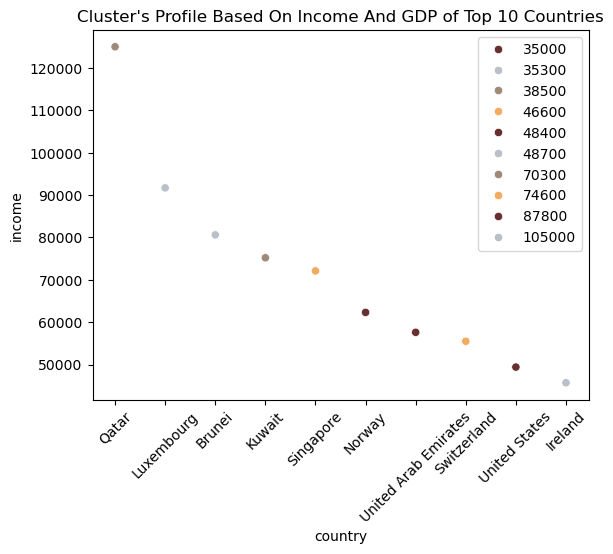

In [201]:
# function calls 
profile_based_cluster_top_10_countries()

In [203]:
def pair_plot():
    """
    This function creates and displays a pair plot for the given numeric data.

    The function performs the following steps:
    1. Creates a pair plot for the provided numerical data using seaborn.
    2. The plot shows scatter plots for each pair of variables, as well as histograms for individual variables.
    3. The `corner=True` parameter ensures that only the lower triangle of the pair plot matrix is plotted, making it less cluttered.
    
    Parameters:
    numeric_data : pandas.DataFrame
        The dataframe containing numerical data for which the pair plot will be created.

    Returns:
    None
    """
    # Drop the 'country' column to use only numerical features
    numeric_data = data.drop(columns=['country'])

    # Create a pair plot for the given numerical data
    sns.pairplot(numeric_data, corner=True)
    
    # Display the plot
    plt.show()

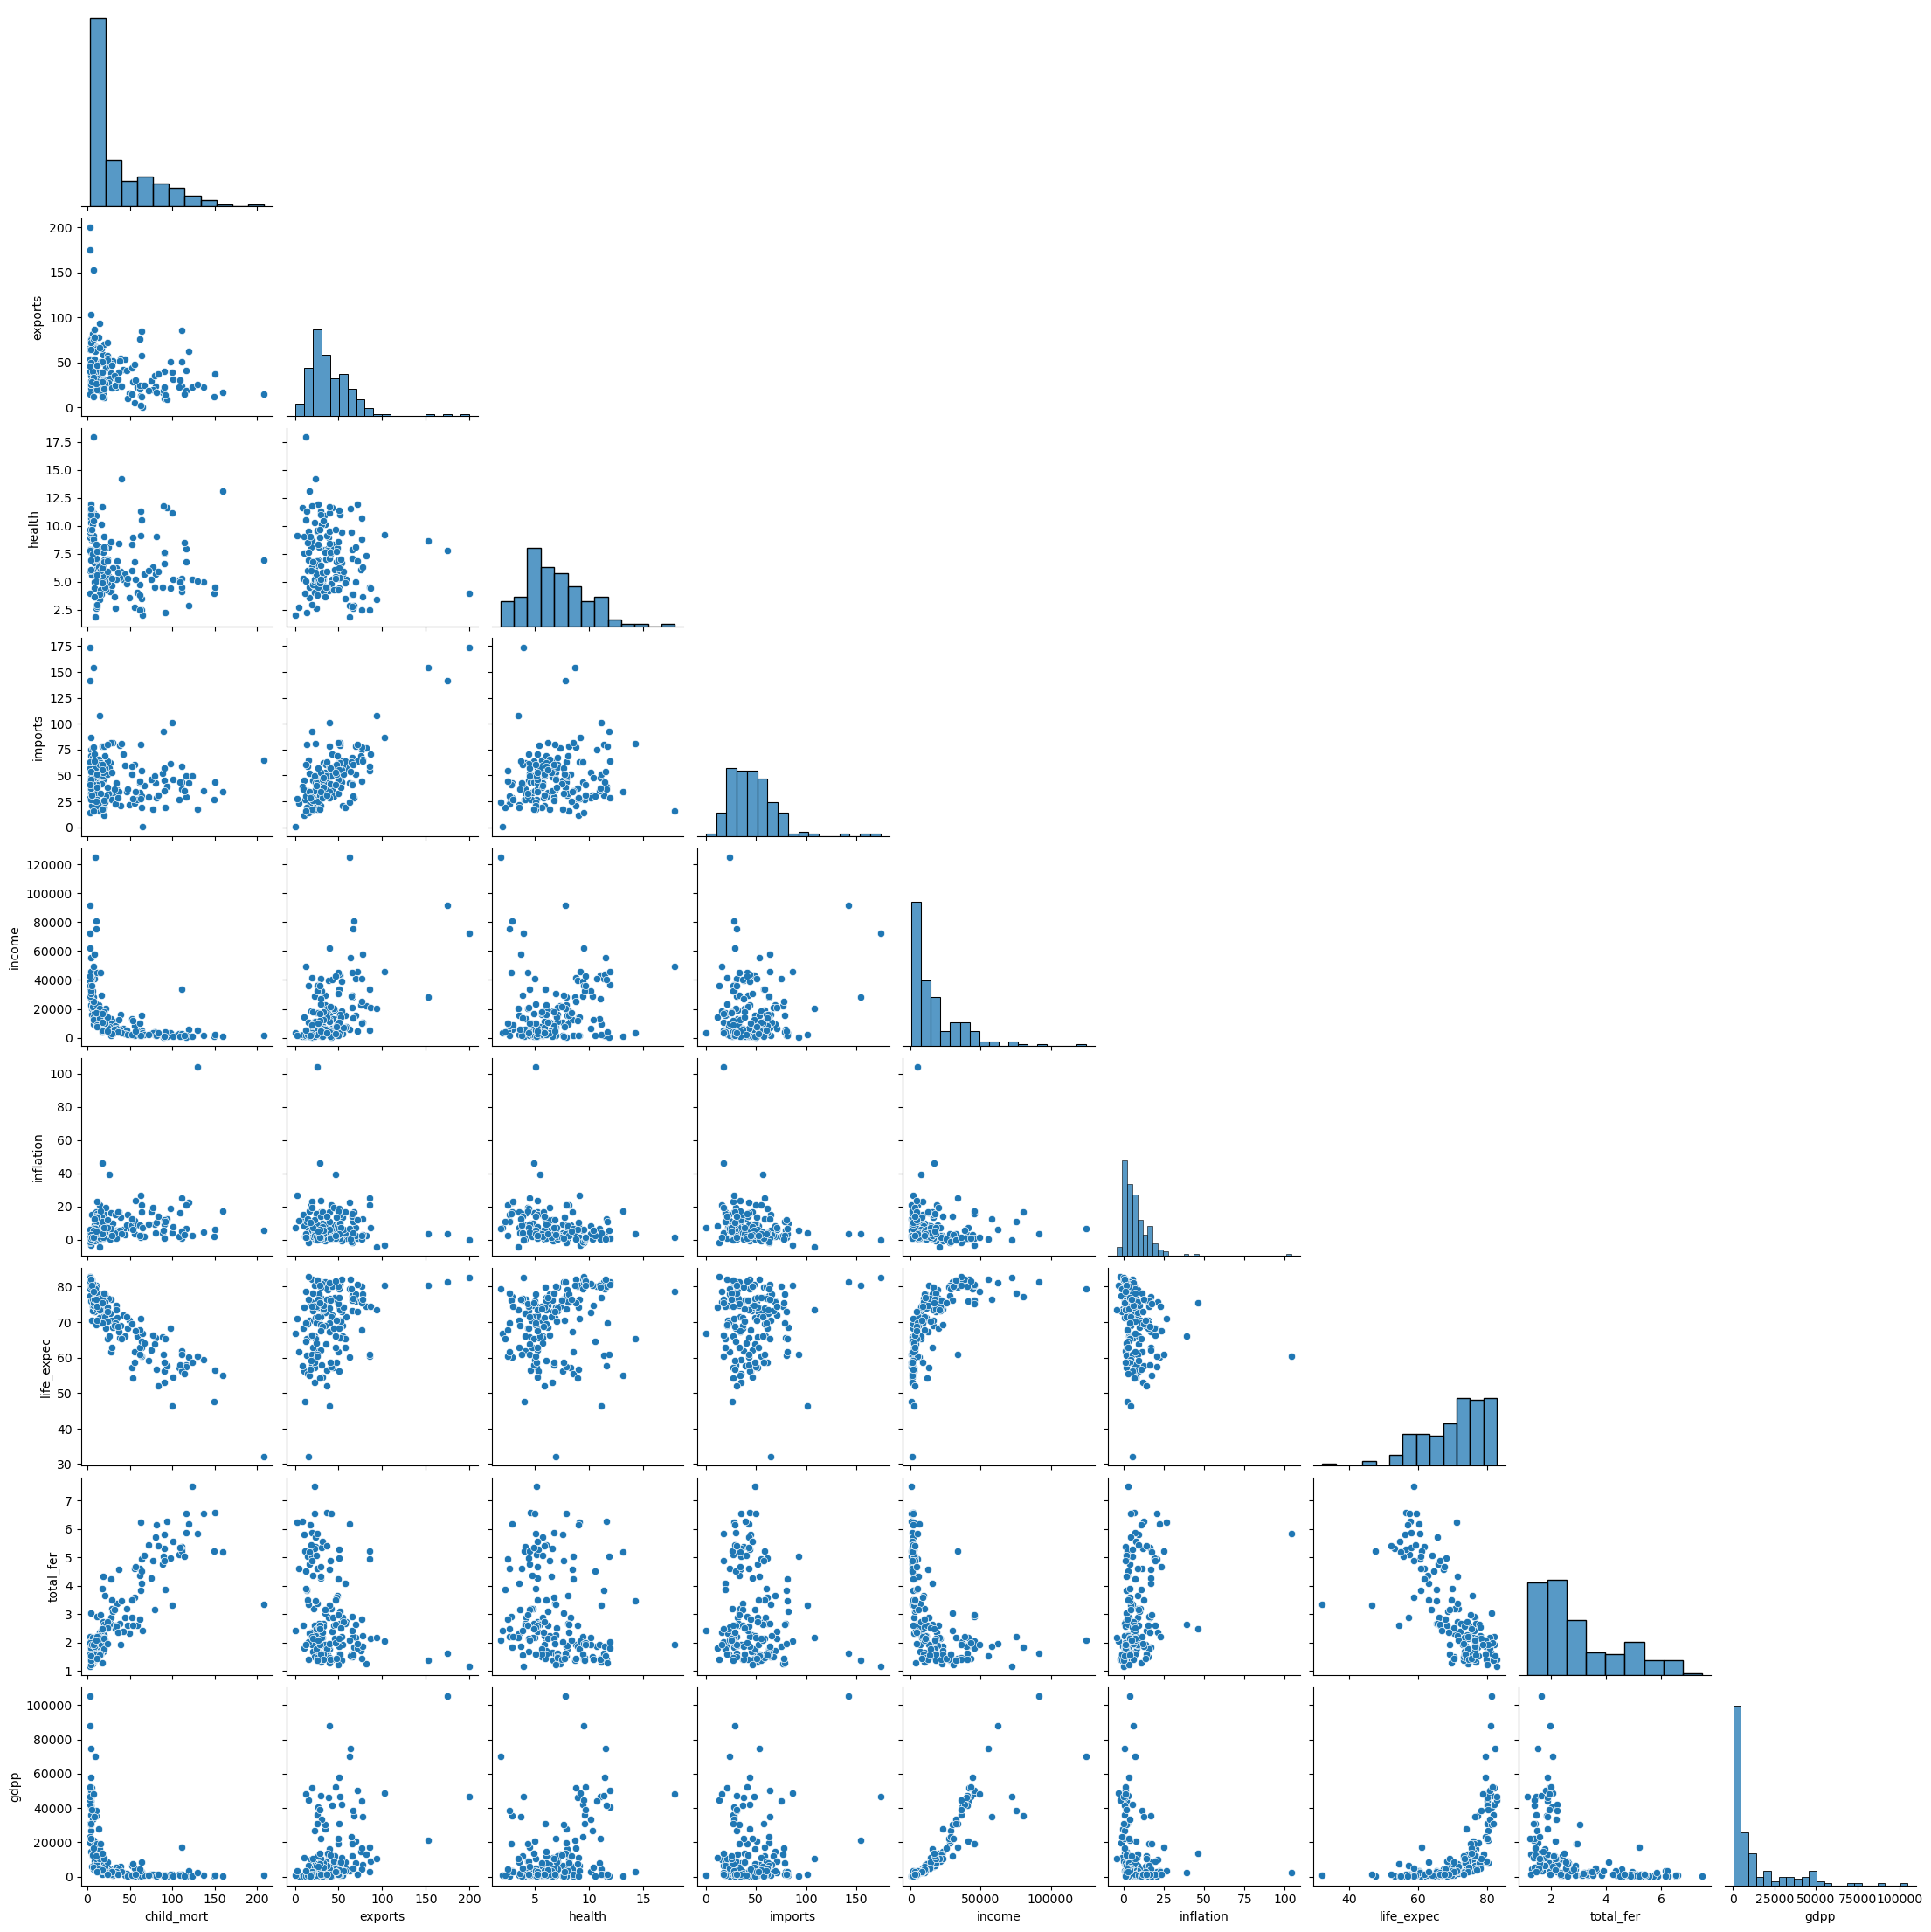

In [205]:
pair_plot()